
# Chapter 4




# Lab: Logistic Regression (LR), LDA, and QDA

## The Stock Market Data

In this lab we will examine the `Smarket`
data, which is part of the `ISLP`
library.

We start by importing  our libraries at this top level; these are all imports we have seen in previous labs.

In [ ]:
!pip install ISLP==0.3.19

In [ ]:
import numpy as np
import pandas as pd
from matplotlib.pyplot import subplots
import statsmodels.api as sm
from ISLP import load_data
from ISLP.models import (ModelSpec as MS, summarize)

We also collect together the new imports needed for this lab.

In [ ]:
from ISLP import confusion_table
from ISLP.models import contrast
from sklearn.discriminant_analysis import \
     (LinearDiscriminantAnalysis as LDA,
      QuadraticDiscriminantAnalysis as QDA)
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression


Now we are ready to load the `Smarket` data. This data set consists of percentage returns for the S&P 500
stock index over 1,250 days, from the beginning of 2001 until the end
of 2005.

For each date, we have recorded the percentage returns for
each of the five previous trading days,  `Lag1`  through
 `Lag5`. We have also recorded  `Volume`  (the number of
shares traded on the previous day, in billions),  `Today`  (the
percentage return on the date in question) and  `Direction`
(whether the market was  `Up`  or  `Down`  on this date).


In [ ]:
Smarket = load_data('Smarket')
Smarket

,Year,Lag1,Lag2,Lag3,Lag4,Lag5,Volume,Today,Direction
0,2001,0.381,-0.192,-2.624,-1.055,5.010,1.19130,0.959,Up
1,2001,0.959,0.381,-0.192,-2.624,-1.055,1.29650,1.032,Up
2,2001,1.032,0.959,0.381,-0.192,-2.624,1.41120,-0.623,Down
3,2001,-0.623,1.032,0.959,0.381,-0.192,1.27600,0.614,Up
4,2001,0.614,-0.623,1.032,0.959,0.381,1.20570,0.213,Up
...,...,...,...,...,...,...,...,...,...
1245,2005,0.422,0.252,-0.024,-0.584,-0.285,1.88850,0.043,Up
1246,2005,0.043,0.422,0.252,-0.024,-0.584,1.28581,-0.955,Down
1247,2005,-0.955,0.043,0.422,0.252,-0.024,1.54047,0.130,Up
1248,2005,0.130,-0.955,0.043,0.422,0.252,1.42236,-0.298,Down


This gives a truncated listing of the data.
We can see what the variable names are.

In [ ]:
Smarket.columns

Index(['Year', 'Lag1', 'Lag2', 'Lag3', 'Lag4', 'Lag5', 'Volume', 'Today',
       'Direction'],
      dtype='object')

We compute the correlation matrix using the `corr()` method
for data frames, which produces a matrix that contains all of
the pairwise correlations among the variables.

By instructing `pandas` to use only numeric variables, the `corr()` method does not report a correlation for the `Direction`  variable because it is
 qualitative.

In [ ]:
Smarket.corr(numeric_only=True)


,Year,Lag1,Lag2,Lag3,Lag4,Lag5,Volume,Today
Year,1.000000,0.029700,0.030596,0.033195,0.035689,0.029788,0.539006,0.030095
Lag1,0.029700,1.000000,-0.026294,-0.010803,-0.002986,-0.005675,0.040910,-0.026155
Lag2,0.030596,-0.026294,1.000000,-0.025897,-0.010854,-0.003558,-0.043383,-0.010250
Lag3,0.033195,-0.010803,-0.025897,1.000000,-0.024051,-0.018808,-0.041824,-0.002448
Lag4,0.035689,-0.002986,-0.010854,-0.024051,1.000000,-0.027084,-0.048414,-0.006900
Lag5,0.029788,-0.005675,-0.003558,-0.018808,-0.027084,1.000000,-0.022002,-0.034860
Volume,0.539006,0.040910,-0.043383,-0.041824,-0.048414,-0.022002,1.000000,0.014592
Today,0.030095,-0.026155,-0.010250,-0.002448,-0.006900,-0.034860,0.014592,1.000000


As one would expect, the correlations between the lagged return  variables and
today’s return are close to zero.  The only substantial correlation is between  `Year`  and
 `Volume`. By plotting the data we see that  `Volume`
is increasing over time. In other words, the average number of shares traded
daily increased from 2001 to 2005.


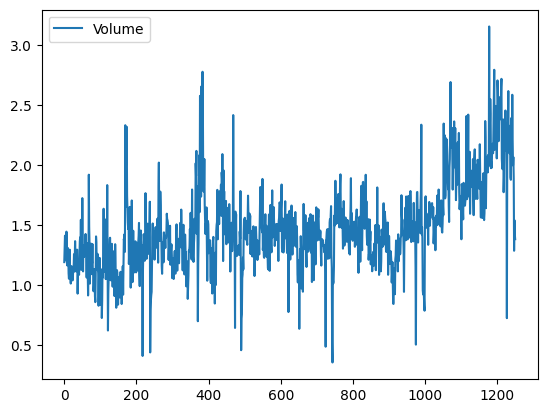

In [ ]:
Smarket.plot(y='Volume');


## Logistic Regression
Next, we will fit a logistic regression model in order to predict
 `Direction`  using  `Lag1`  through  `Lag5`  and
 `Volume`. The `sm.GLM()`  function fits *generalized linear models*, a class of
models that includes logistic regression.  Alternatively,
the function `sm.Logit()` fits a logistic regression
model directly. The syntax of
`sm.GLM()` is similar to that of `sm.OLS()`, except
that we must pass in the argument `family=sm.families.Binomial()`
in order to tell `statsmodels` to run a logistic regression rather than some other
type of generalized linear model.

In [ ]:
allvars = Smarket.columns.drop(['Today', 'Direction', 'Year'])
design = MS(allvars)   # an instance of the ModelSpec class
X = design.fit_transform(Smarket) # transform the data defined in ModelSpec
y = Smarket.Direction == 'Up'  # boolean series
glm = sm.GLM(y, X, family=sm.families.Binomial()) # specify as binomial for LR
results = glm.fit()
summarize(results)


,coef,std err,z,P>|z|
intercept,-0.1260,0.241,-0.523,0.601
Lag1,-0.0731,0.050,-1.457,0.145
Lag2,-0.0423,0.050,-0.845,0.398
Lag3,0.0111,0.050,0.222,0.824
Lag4,0.0094,0.050,0.187,0.851
Lag5,0.0103,0.050,0.208,0.835
Volume,0.1354,0.158,0.855,0.392


The smallest *p*-value here is associated with  `Lag1`. The
negative coefficient for this predictor suggests that if the market
had a positive return yesterday, then it is less likely to go up
today. However, at a value of 0.15, the *p*-value is still
relatively large, and so there is no clear evidence of a real
association between  `Lag1`  and  `Direction`.

We use the `params`  attribute of `results`
in order to access just the
coefficients for this fitted model.

In [ ]:
results.params


intercept   -0.126000
Lag1        -0.073074
Lag2        -0.042301
Lag3         0.011085
Lag4         0.009359
Lag5         0.010313
Volume       0.135441
dtype: float64

Likewise we can use the
`pvalues`  attribute to access the *p*-values for the coefficients.

In [ ]:
results.pvalues


intercept    0.600700
Lag1         0.145232
Lag2         0.398352
Lag3         0.824334
Lag4         0.851445
Lag5         0.834998
Volume       0.392404
dtype: float64

The `predict()`  method of `results` can be used to predict the
probability that the market will go up, given values of the
predictors. This method returns predictions
on the probability scale. If no data set is supplied to the `predict()`
function, then the probabilities are computed for the training data
that was used to fit the logistic regression model.
As with linear regression, one can pass an optional `exog` argument consistent
with a design matrix if desired. Here we have
printed only the first ten probabilities.

In [ ]:
probs = results.predict()
probs[:10]


array([0.50708413, 0.48146788, 0.48113883, 0.51522236, 0.51078116,
       0.50695646, 0.49265087, 0.50922916, 0.51761353, 0.48883778])

In order to make a prediction as to whether the market will go up or
down on a particular day, we must convert these predicted
probabilities into class labels,  `Up`  or  `Down`.  The
following two commands create a vector of class predictions based on
whether the predicted probability of a market increase is greater than
or less than 0.5.

In [ ]:
labels = np.array(['Down']*1250)
labels[probs>0.5] = "Up"


The `confusion_table()`
function from the `ISLP` package summarizes these predictions, showing   how
many observations were correctly or incorrectly classified. Our function, which is adapted from a similar function
in the module `sklearn.metrics`,  transposes the resulting
matrix and includes row and column labels.
The `confusion_table()` function takes as first argument the
predicted labels, and second argument the true labels.

In [ ]:
confusion_table(labels, Smarket.Direction)


Truth,Down,Up
Predicted,,
Down,145,141
Up,457,507


In [ ]:
from sklearn.metrics import confusion_matrix

confusion_matrix(Smarket.Direction, labels)

array([[145, 457],
       [141, 507]])

The diagonal elements of the confusion matrix indicate correct
predictions, while the off-diagonals represent incorrect
predictions. Hence our model correctly predicted that the market would
go up on 507 days and that it would go down on 145 days, for a
total of 507 + 145 = 652 correct predictions. The `np.mean()`
function can be used to compute the fraction of days for which the
prediction was correct. In this case, logistic regression correctly
predicted the movement of the market 52.2% of the time.


In [ ]:
(507+145)/1250, np.mean(labels == Smarket.Direction)


(0.5216, 0.5216)

At first glance, it appears that the logistic regression model is
working a little better than random guessing. However, this result is
misleading because we trained and tested the model on the same set of
1,250 observations. In other words, $100-52.2=47.8%$ is the
*training* error  rate. As we have seen
previously, the training error rate is often overly optimistic --- it
tends to underestimate the test error rate.  In
order to better assess the accuracy of the logistic regression model
in this setting, we can fit the model using part of the data, and
then examine how well it predicts the *held out* data.  This
will yield a more realistic error rate, in the sense that in practice
we will be interested in our model’s performance not on the data that
we used to fit the model, but rather on days in the future for which
the market’s movements are unknown.

To implement this strategy, we first create a Boolean vector
corresponding to the observations from 2001 through 2004. We  then
use this vector to create a held out data set of observations from
2005.

In [ ]:
train = (Smarket.Year < 2005)
Smarket_train = Smarket.loc[train]
Smarket_test = Smarket.loc[~train]
Smarket_test.shape


(252, 9)

The object `train` is a vector of 1,250 elements, corresponding
to the observations in our data set. The elements of the vector that
correspond to observations that occurred before 2005 are set to
`True`, whereas those that correspond to observations in 2005 are
set to `False`.  Hence `train` is a
*boolean*   array, since its
elements are `True` and `False`.  Boolean arrays can be used
to obtain a subset of the rows or columns of a data frame
using the `loc` method. For instance,
the command `Smarket.loc[train]` would pick out a submatrix of the
stock market data set, corresponding only to the dates before 2005,
since those are the ones for which the elements of `train` are
`True`.  The `~` symbol can be used to negate all of the
elements of a Boolean vector. That is, `~train` is a vector
similar to `train`, except that the elements that are `True`
in `train` get swapped to `False` in `~train`, and vice versa.
Therefore, `Smarket.loc[~train]` yields a
subset of the rows of the data frame
of the stock market data containing only the observations for which
`train` is `False`.
The output above indicates that there are 252 such
observations.

We now fit a logistic regression model using only the subset of the
observations that correspond to dates before 2005. We then obtain predicted probabilities of the
stock market going up for each of the days in our test set --- that is,
for the days in 2005.

In [ ]:
X_train, X_test = X.loc[train], X.loc[~train]
y_train, y_test = y.loc[train], y.loc[~train]
glm_train = sm.GLM(y_train, X_train, family=sm.families.Binomial())
results = glm_train.fit()
probs = results.predict(exog=X_test)


Notice that we have trained and tested our model on two completely
separate data sets: training was performed using only the dates before
2005, and testing was performed using only the dates in 2005.

Finally, we compare the predictions for 2005 to the
actual movements of the market over that time period.
We will first store the test and training labels (recall `y_test` is binary).

In [ ]:
D = Smarket.Direction
L_train, L_test = D.loc[train], D.loc[~train]


Now we threshold the
fitted probability at 50% to form
our predicted labels.

In [ ]:
labels = np.array(['Down']*252)
labels[probs>0.5] = 'Up'
confusion_table(labels, L_test)


Truth,Down,Up
Predicted,,
Down,77,97
Up,34,44


The test accuracy is about 48% while the error rate is about 52%

In [ ]:
np.mean(labels == L_test), np.mean(labels != L_test)


(0.4801587301587302, 0.5198412698412699)

The `!=` notation means *not equal to*, and so the last command
computes the test set error rate. The results are rather
disappointing: the test error rate is 52%, which is worse than
random guessing! Of course this result is not all that surprising,
given that one would not generally expect to be able to use previous
days’ returns to predict future market performance. (After all, if it
were possible to do so, then the authors of this book would be out
striking it rich rather than writing a statistics textbook.)

We recall that the logistic regression model had very underwhelming
*p*-values associated with all of the predictors, and that the
smallest *p*-value, though not very small, corresponded to
 `Lag1`. Perhaps by removing the variables that appear not to be
helpful in predicting  `Direction`, we can obtain a more
effective model. After all, using predictors that have no relationship
with the response tends to cause a deterioration in the test error
rate (since such predictors cause an increase in variance without a
corresponding decrease in bias), and so removing such predictors may
in turn yield an improvement.  Below we refit the logistic
regression using just  `Lag1`  and  `Lag2`, which seemed to
have the highest predictive power in the original logistic regression
model.

In [ ]:
model = MS(['Lag1', 'Lag2']).fit(Smarket)
X = model.transform(Smarket)
X_train, X_test = X.loc[train], X.loc[~train]
glm_train = sm.GLM(y_train, X_train, family=sm.families.Binomial())
results = glm_train.fit()
probs = results.predict(exog=X_test)
labels = np.array(['Down']*252)
labels[probs>0.5] = 'Up'
confusion_table(labels, L_test)


Truth,Down,Up
Predicted,,
Down,35,35
Up,76,106


Let’s evaluate the overall accuracy as well as the accuracy within the days when
logistic regression predicts an increase.

In [ ]:
(35+106)/252,106/(106+76)


(0.5595238095238095, 0.5824175824175825)

Now the results appear to be a little better: 56% of the daily
movements have been correctly predicted. It is worth noting that in
this case, a much simpler strategy of predicting that the market will
increase every day will also be correct 56% of the time! Hence, in
terms of overall error rate, the logistic regression method is no
better than the naive approach. However, the confusion matrix
shows that on days when logistic regression predicts an increase in
the market, it has a 58% accuracy rate. This suggests a possible
trading strategy of buying on days when the model predicts an
increasing market, and avoiding trades on days when a decrease is
predicted. Of course one would need to investigate more carefully
whether this small improvement was real or just due to random chance.

Suppose that we want to predict the returns associated with particular
values of  `Lag1`  and  `Lag2`. In particular, we want to
predict  `Direction`  on a day when  `Lag1`  and
 `Lag2`  equal $1.2$ and $1.1$, respectively, and on a day when they
equal $1.5$ and $-0.8$.  We do this using the `predict()`
function.

In [ ]:
newdata = pd.DataFrame({'Lag1':[1.2, 1.5], 'Lag2':[1.1, -0.8]});
newX = model.transform(newdata)
results.predict(newX)


0    0.479146
1    0.496094
dtype: float64

## Linear Discriminant Analysis

We begin by performing LDA on the  `Smarket`  data, using the function
`LinearDiscriminantAnalysis()`, which we have abbreviated `LDA()`. We
fit the model using only the observations before 2005.

In [ ]:
lda = LDA(store_covariance=True)


Since the `LDA` estimator automatically
adds an intercept, we should remove the column corresponding to the
intercept in both `X_train` and `X_test`. We can also directly
use the labels rather than the Boolean vectors `y_train`.

In [ ]:
X_train, X_test = [M.drop(columns=['intercept'])
                   for M in [X_train, X_test]]
lda.fit(X_train, L_train)


LinearDiscriminantAnalysis(store_covariance=True)

Here we have used the list comprehensions introduced
in Section 3.6.4. Looking at our first line above, we see that the right-hand side is a list
of length two. This is because the code `for M in [X_train, X_test]` iterates over a list
of length two. While here we loop over a list,
the list comprehension method works when looping over any iterable object.
We then apply the `drop()` method to each element in the iteration, collecting
the result in a list. The left-hand side tells `Python` to unpack this list
of length two, assigning its elements to the variables `X_train` and `X_test`. Of course,
this overwrites the previous values of `X_train` and `X_test`.

Having fit the model, we can extract the means in the two classes with the `means_` attribute. These are the average of each predictor within each class, and
are used by LDA as estimates of $\mu_k$.  These suggest that there is
a tendency for the previous 2 days’ returns to be negative on days
when the market increases, and a tendency for the previous days’
returns to be positive on days when the market declines.

In [ ]:
lda.means_


array([[ 0.04279022,  0.03389409],
       [-0.03954635, -0.03132544]])

The estimated prior probabilities are stored in the `priors_` attribute.
The package `sklearn` typically uses this trailing `_` to denote
a quantity estimated when using the `fit()` method. We can be sure of which
entry corresponds to which label by looking at the `classes_` attribute.

In [ ]:
lda.classes_


array(['Down', 'Up'], dtype='<U4')

The LDA output indicates that $\hat\pi_{Down}=0.492$ and
$\hat\pi_{Up}=0.508$.


In [ ]:
lda.priors_


array([0.49198397, 0.50801603])

The linear discriminant vectors can be found in the `scalings_` attribute:

In [ ]:
lda.scalings_


array([[-0.64201904],
       [-0.51352928]])

These values provide the linear combination of `Lag1`  and `Lag2`  that are used to form the LDA decision rule. In other words, these are the multipliers of the elements of $X=x$ in (4.24).
  If $-0.64\times `Lag1`  - 0.51 \times `Lag2` $ is large, then the LDA classifier will predict a market increase, and if it is small, then the LDA classifier will predict a market decline.

In [ ]:
lda_pred = lda.predict(X_test)


As we observed in our comparison of classification methods
 (Section 4.5),  the LDA and logistic
regression predictions are almost identical.

In [ ]:
confusion_table(lda_pred, L_test)


Truth,Down,Up
Predicted,,
Down,35,35
Up,76,106


We can also estimate the
probability of each class for
each point in a test set. Applying a 50% threshold to the posterior probabilities of
being in class one allows us to
recreate the predictions contained in `lda_pred`.

In [ ]:
lda_prob = lda.predict_proba(X_test)
np.all(
       np.where(lda_prob[:,1] >= 0.5, 'Up','Down') == lda_pred
       )


True

Above, we used the `np.where()`  function that
creates an array with value `'Up'` for indices where
the second column of `lda_prob` (the estimated
posterior probability of `'Up'`) is greater than 0.5.
For problems with more than two classes the labels are chosen as the class whose posterior probability is highest:

In [ ]:
np.all(
       [lda.classes_[i] for i in np.argmax(lda_prob, 1)] == lda_pred
       )


True

If we wanted to use a posterior probability threshold other than
50% in order to make predictions, then we could easily do so. For
instance, suppose that we wish to predict a market decrease only if we
are very certain that the market will indeed decrease on that
day --- say, if the posterior probability is at least 90%.
We know that the first column of `lda_prob` corresponds to the
label `Down` after having checked the `classes_` attribute, hence we use
the column index 0 rather than 1 as we did above.

In [ ]:
np.sum(lda_prob[:,0] > 0.9)


0

No days in 2005 meet that threshold! In fact, the greatest posterior
probability of decrease in all of 2005 was 52.02%.

The LDA classifier above is the first classifier from the
`sklearn` library. We will use several other objects
from this library. The objects
follow a common structure that simplifies tasks such as cross-validation,
which we will see in Chapter 5. Specifically,
the methods first create a generic classifier without
referring to any data. This classifier is then fit
to data with the `fit()`  method and predictions are
always produced with the `predict()` method. This pattern
of first instantiating the classifier, followed by fitting it, and
then producing predictions is an explicit design choice of `sklearn`. This uniformity
makes it possible to cleanly copy the classifier so that it can be fit
on different data; e.g. different training sets arising in cross-validation.
This standard pattern also allows for a predictable formation of workflows.


## Quadratic Discriminant Analysis
We will now fit a QDA model to the  `Smarket`  data. QDA is
implemented via
`QuadraticDiscriminantAnalysis()`
in the `sklearn` package, which we abbreviate to `QDA()`.
The syntax is very similar to `LDA()`.

In [ ]:
qda = QDA(store_covariance=True)
qda.fit(X_train, L_train)


QuadraticDiscriminantAnalysis(store_covariance=True)

The `QDA()` function will again compute `means_` and `priors_`.

In [ ]:
qda.means_, qda.priors_


(array([[ 0.04279022,  0.03389409],
        [-0.03954635, -0.03132544]]),
 array([0.49198397, 0.50801603]))

The `QDA()` classifier will estimate one covariance per class. Here is the
estimated covariance in the first class:

In [ ]:
qda.covariance_[0]


array([[ 1.50662277, -0.03924806],
       [-0.03924806,  1.53559498]])

The output contains the group means. But it does not contain the
coefficients of the linear discriminants, because the QDA classifier
involves a quadratic, rather than a linear, function of the
predictors. The `predict()`  function works in exactly the
same fashion as for LDA.

In [ ]:
qda_pred = qda.predict(X_test)
confusion_table(qda_pred, L_test)


Truth,Down,Up
Predicted,,
Down,30,20
Up,81,121


Interestingly, the QDA predictions are accurate almost 60% of the
time, even though the 2005 data was not used to fit the model.

In [ ]:
np.mean(qda_pred == L_test)


0.5992063492063492

This level of accuracy is quite impressive for stock market data, which is
known to be quite hard to model accurately.  This suggests that the
quadratic form assumed by QDA may capture the true relationship more
accurately than the linear forms assumed by LDA and logistic
regression.  However, we recommend evaluating this method’s
performance on a larger test set before betting that this approach
will consistently beat the market!

## Naive Bayes
Next, we fit a naive Bayes model to the `Smarket` data. The syntax is
similar to that of `LDA()` and `QDA()`. By
default, this implementation `GaussianNB()` of the naive Bayes classifier models each
quantitative feature using a Gaussian distribution. However, a kernel
density method can also be used to estimate the distributions.

In [ ]:
NB = GaussianNB()
NB.fit(X_train, L_train)


GaussianNB()

The classes are stored as `classes_`.

In [ ]:
NB.classes_


array(['Down', 'Up'], dtype='<U4')

The class prior probabilities are stored in the `class_prior_` attribute.

In [ ]:
NB.class_prior_


array([0.49198397, 0.50801603])

The parameters of the features can be found in the `theta_` and `var_` attributes. The number of rows
is equal to the number of classes, while the number of columns is equal to the number of features.
We see below that the mean for feature `Lag1` in the `Down` class is 0.043.

In [ ]:
NB.theta_


array([[ 0.04279022,  0.03389409],
       [-0.03954635, -0.03132544]])

Its variance is 1.503.

In [ ]:
NB.var_


array([[1.50355429, 1.53246749],
       [1.51401364, 1.48732877]])

How do we know the names of these attributes? We use `NB?` (or `?NB`).

We can easily verify the mean computation:

In [ ]:
X_train[L_train == 'Down'].mean()


Lag1    0.042790
Lag2    0.033894
dtype: float64

Similarly for the variance:

In [ ]:
X_train[L_train == 'Down'].var(ddof=0)


Lag1    1.503554
Lag2    1.532467
dtype: float64

Since `NB()` is a classifier in the `sklearn` library, making predictions
uses the same syntax as for `LDA()` and `QDA()` above.

In [ ]:
nb_labels = NB.predict(X_test)
confusion_table(nb_labels, L_test)


Truth,Down,Up
Predicted,,
Down,29,20
Up,82,121


Naive Bayes performs well on these data, with accurate predictions over 59% of the time. This is slightly worse than QDA, but much better than LDA.

As for `LDA`, the `predict_proba()` method estimates the probability that each observation belongs to a particular class.

In [ ]:
NB.predict_proba(X_test)[:5]


array([[0.4873288 , 0.5126712 ],
       [0.47623584, 0.52376416],
       [0.46529531, 0.53470469],
       [0.47484469, 0.52515531],
       [0.49020587, 0.50979413]])